In [3]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])
import os 
import numpy as np
import matplotlib.pyplot as plt

from lalframe.utils.frtools import get_channels

from gwpy.timeseries import TimeSeries

In [13]:
trigger_time = 1187008882.43
duration = 128
post_trigger_duration = 2
gps_start = trigger_time - duration + post_trigger_duration
gps_end = trigger_time + post_trigger_duration
ext = "hdf5"
freq = 16
for det in ["H", "L", "V"]:
    data_path = "/home/thibeau.wouters/gw-datasets/GW170817/" # on CIT
    example_file = f"{data_path}{det}-{det}1_LOSC_CLN_{freq}_V1-1187007040-2048.{ext}"   
    print("Example file: ", example_file)
    channel = f"{det}1:LOSC-STRAIN"

    if ext == "gwf":
        channels = get_channels(example_file)
        channel = channels[-1]
        print(channels)
        data = TimeSeries.read(example_file, channel=channel, start=gps_start, end=gps_end, format = "gwf")
    elif ext == "hdf5":
        data = TimeSeries.read(example_file, start=gps_start, end=gps_end, format = "hdf5.gwosc")
    print(data.value)

Example file:  /home/thibeau.wouters/gw-datasets/GW170817/H-H1_LOSC_CLN_16_V1-1187007040-2048.hdf5
[-3.31196150e-17 -3.31146100e-17 -3.31289993e-17 ...
 -2.21744293e-17 -2.21739475e-17 -2.21621976e-17]
Example file:  /home/thibeau.wouters/gw-datasets/GW170817/L-L1_LOSC_CLN_16_V1-1187007040-2048.hdf5
[7.61029753e-19 7.59912400e-19 7.61505862e-19 ... 7.41384904e-19
 7.33998440e-19 7.22670777e-19]
Example file:  /home/thibeau.wouters/gw-datasets/GW170817/V-V1_LOSC_CLN_16_V1-1187007040-2048.hdf5
[-6.80203349e-20  5.13027704e-19  2.92536584e-22 ...
  1.06760407e-18  1.60276454e-19  9.75903344e-19]


/home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_H1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817_h1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_L1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817_l1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_V1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817_v1_psd.txt


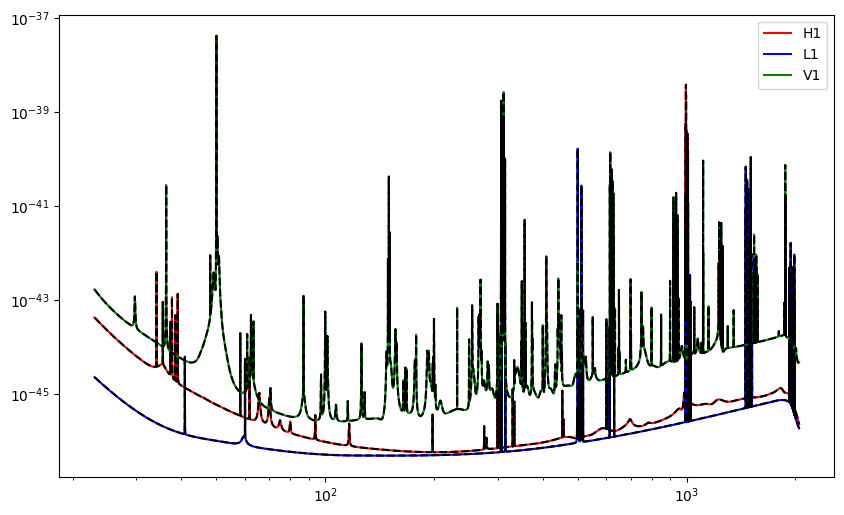

In [11]:
plt.figure(figsize=(10, 6))
for det, color in zip(["H", "L", "V"], ["red", "blue", "green"]):
    data_path = "/home/thibeau.wouters/gw-datasets/GW170817/" # on CIT
    file = f"{data_path}GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_{det}1_psd.txt"

    print(file)

    freq, psd = np.loadtxt(file, unpack=True)
    plt.loglog(freq, psd, color = color, linestyle = "-", label = f"{det}1")
    
    file = f"{data_path}GW170817_{det.lower()}1_psd.txt"
    
    print(file)

    freq, psd = np.loadtxt(file, unpack=True)
    plt.loglog(freq, psd, linestyle = "--", color = "black")
    
plt.legend()
plt.show()